# Описание проекта
Здесь должно находиться Лого проекта, и его описание. Мотивация, средства. Указать ссылки на используемые ресурсы. Так как ипользуется html, то все картинки должны быть расположены на доступных сервисах

Можно указать, что используется вычислительная платформа Анаконда (Картинки logo Anaconda & Jupyter)
<p><img class="logo logo-dark" alt="logo" src="https://www.anaconda.com/wp-content/themes/anaconda/images/logo-dark.png"></p>

In [1]:
#some initial setup
# Importing pandas
import pandas as pd
# This command makes plots appear in the notebook
%matplotlib inline

# Загрузка данных
<p><img class="logo logo-dark" alt="logo" src="https://www.anaconda.com/wp-content/themes/anaconda/images/logo-dark.png"></p>
Первоначально данные загружаются с ресурса <a href="https://wonder.cdc.gov">CDC WONDER</a> в виде текстовых файлов. Затем эти сырые данные нужно загрузить в память в так называемые фреймы данных <b>pandas</b>:

In [11]:
# Assign filename: file
file = 'datasets/maxTempByMonthYear1999-2011completeCalifornia.txt'

# Import file: data
raw_temp_data = pd.read_csv(file, sep='\t', converters={"Year":int, 'Month Code':int, 'Day of Month':int,'Avg Daily Max Air Temperature (C)':float})

# Print the head of the DataFrame
print(raw_temp_data.head())

   Notes       State  State Code  Year  Year Code Month  Month Code  \
0    NaN  California           6  1999       1999   Jan           1   
1    NaN  California           6  1999       1999   Jan           1   
2    NaN  California           6  1999       1999   Jan           1   
3    NaN  California           6  1999       1999   Jan           1   
4    NaN  California           6  1999       1999   Jan           1   

   Day of Month  Day of Month Code  Avg Daily Max Air Temperature (C)  
0             1                  1                              13.35  
1             2                  2                              14.78  
2             3                  3                              13.77  
3             4                  4                              14.32  
4             5                  5                              14.89  


Теперь нужно избавиться от лишнего, создадим новый фрейм с колонками для дат и максимальной температуры:

In [12]:
raw_temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4514 entries, 0 to 4513
Data columns (total 10 columns):
Notes                                0 non-null float64
State                                4514 non-null object
State Code                           4514 non-null int64
Year                                 4514 non-null int64
Year Code                            4514 non-null int64
Month                                4514 non-null object
Month Code                           4514 non-null int64
Day of Month                         4514 non-null int64
Day of Month Code                    4514 non-null int64
Avg Daily Max Air Temperature (C)    4514 non-null float64
dtypes: float64(2), int64(6), object(2)
memory usage: 352.7+ KB


In [13]:
california_temp_data = raw_temp_data[['State', 'Year', 'Month Code', 'Day of Month', 'Avg Daily Max Air Temperature (C)']]

In [14]:
california_temp_data.head()

,State,Year,Month Code,Day of Month,Avg Daily Max Air Temperature (C)
0,California,1999,1,1,13.35
1,California,1999,1,2,14.78
2,California,1999,1,3,13.77
3,California,1999,1,4,14.32
4,California,1999,1,5,14.89


In [15]:
california_temp_data.columns = ['state','year', 'month','day','max_temp']

In [16]:
california_temp_data.head()

,state,year,month,day,max_temp
0,California,1999,1,1,13.35
1,California,1999,1,2,14.78
2,California,1999,1,3,13.77
3,California,1999,1,4,14.32
4,California,1999,1,5,14.89


In [24]:
california_summer_temp_data = california_temp_data[(california_temp_data['month']>=5) & (california_temp_data['month']<=9)]

In [26]:
california_summer_temp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989 entries, 113 to 4429
Data columns (total 5 columns):
state       1989 non-null object
year        1989 non-null int64
month       1989 non-null int64
day         1989 non-null int64
max_temp    1989 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 93.2+ KB


In [27]:
california_summer_temp_data.head(10)

,state,year,month,day,max_temp
113,California,1999,5,1,18.79
114,California,1999,5,2,15.01
115,California,1999,5,3,12.95
116,California,1999,5,4,16.11
117,California,1999,5,5,22.11
118,California,1999,5,6,23.43
119,California,1999,5,7,20.93
120,California,1999,5,8,19.19
121,California,1999,5,9,18.02
122,California,1999,5,10,19.22


In [28]:
df_1999 = california_summer_temp_data[california_summer_temp_data['year']==1999]

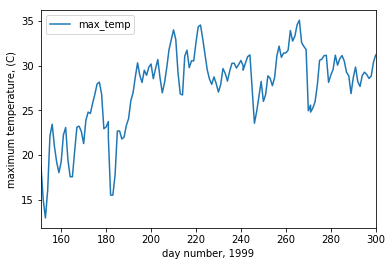

In [32]:
ax = df_1999.plot(x=30*df_1999['month']+df_1999['day'], y = 'max_temp')
_ = ax.set_xlabel("day number, 1999")
_ = ax.set_ylabel("maximum temperature, (C)")

Теперь попробуем сгруппировать данные по годам и месяцам:

In [33]:
california_summer_temp_data.groupby(['year','month'])['max_temp'].max()

year  month
1999  5        28.14
      6        33.99
      7        34.54
      8        35.07
      9        31.19
2000  5        31.60
      6        34.78
      7        36.10
      8        36.40
      9        33.73
2001  5        33.67
      6        33.70
      7        37.19
      8        36.42
      9        32.78
2002  5        30.93
      6        32.33
      7        37.41
      8        36.70
      9        35.02
2003  5        32.44
      6        34.43
      7        35.98
      8        34.75
      9        34.18
2004  5        29.49
      6        31.25
      7        34.70
      8        36.88
      9        33.90
               ...  
2006  5        29.98
      6        35.68
      7        38.41
      8        33.86
      9        34.23
2007  5        28.46
      6        32.60
      7        38.09
      8        36.12
      9        34.79
2008  5        32.27
      6        34.08
      7        37.14
      8        35.91
      9        35.37
2009  5        32.85
 

# Данные о смертности от инсультов

Мы получили ежемесячные данные о смертности от сосудистых заболеваний по всем штатам США за период с 1999 по 2011 годы.
Нужно выделить данные о смертности от инсультов:

In [34]:
# Assign filename: file
file = 'datasets/causeOfDeathAllStates01_56_I00-I78_1999-2011.txt'

# Import file: data
#raw_temp_data = pd.read_csv(file, sep='\t', converters={"Year":int, 'Month Code':int, 'Day of Month':int,'Avg Daily Max Air Temperature (C)':float})
raw_death_data = pd.read_csv(file, sep='\t')
# Print the head of the DataFrame
print(raw_death_data.head())

   Notes    State  State Code  Year  Year Code       Month Month Code  \
0    NaN  Alabama           1  1999       1999  Jan., 1999    1999/01   
1    NaN  Alabama           1  1999       1999  Jan., 1999    1999/01   
2    NaN  Alabama           1  1999       1999  Jan., 1999    1999/01   
3    NaN  Alabama           1  1999       1999  Jan., 1999    1999/01   
4    NaN  Alabama           1  1999       1999  Feb., 1999    1999/02   

                                      Cause of death Cause of death Code  \
0              Subarachnoid haemorrhage, unspecified               I60.9   
1             Intracerebral haemorrhage, unspecified               I61.9   
2                   Cerebral infarction, unspecified               I63.9   
3  Stroke, not specified as haemorrhage or infarc...                 I64   
4             Intracerebral haemorrhage, unspecified               I61.9   

   Deaths      Population      Crude Rate  
0      12  Not Applicable  Not Applicable  
1      29  Not A

In [37]:
death_data = raw_death_data[['State', 'Year', 'Month Code', 'Cause of death Code', 'Deaths']]

In [38]:
stroke_death_data = death_data[death_data['Cause of death Code']=='I64']

In [39]:
stroke_death_data.head()

,State,Year,Month Code,Cause of death Code,Deaths
3,Alabama,1999,1999/01,I64,107
5,Alabama,1999,1999/02,I64,98
8,Alabama,1999,1999/03,I64,114
10,Alabama,1999,1999/04,I64,91
12,Alabama,1999,1999/05,I64,89


In [40]:
stroke_death_data.tail()

,State,Year,Month Code,Cause of death Code,Deaths
22261,Wyoming,2004,2004/07,I64,10
22262,Wyoming,2005,2005/02,I64,10
22263,Wyoming,2005,2005/07,I64,11
22264,Wyoming,2006,2006/09,I64,11
22265,Wyoming,2007,2007/10,I64,10


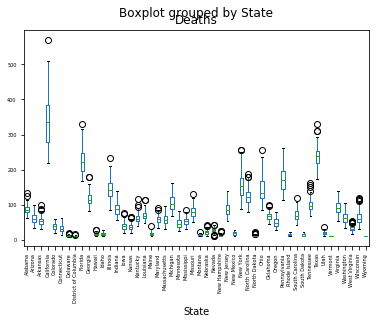

In [43]:
stroke_death_data.boxplot(by='State', 
                       column=['Deaths'], 
                       grid=False, rot=90, fontsize=5)